<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**


---

# Classificação com PyCaret - Wine

Agora que já conhecemos o PyCaret e todo o seu poder, vou focar mais nas partes dos diferentes tipos de problema que ele consegue resolver, do que simplesmente no próprio framework.

<p align="center"><img src="https://images.unsplash.com/photo-1539519532614-723937382b86?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80" width="40%"></p>

Para ver, novamente, em mais detalhes, tudo sobre o PyCaret, volte para a aula de Regressão.

Com isso em mente, utilizaremos aqui, novamente, o framework de Auto Machine Learning **PyCaret**.

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais.


## Instalando o PyCaret

Lembrando que, por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da lib.

In [ ]:
#@title
# instalando a biblioteca
!pip install pycaret -q

     |████████████████████████████████| 264 kB 19.3 MB/s 
     |████████████████████████████████| 6.8 MB 30.2 MB/s 
     |████████████████████████████████| 14.6 MB 106 kB/s 
     |████████████████████████████████| 111 kB 45.8 MB/s 
     |████████████████████████████████| 1.7 MB 42.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 7.7 MB/s 
     |████████████████████████████████| 271 kB 43.5 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 248 kB 58.5 MB/s 
     |████████████████████████████████| 1.3 MB 32.3 MB/s 
     |████████████████████████████████| 167 kB 51.6 MB/s 
     |████████████████████████████████| 102 kB 58.4 MB/s 
     |████████████████████████████████| 636 kB 44.9 MB/s 
     |█████████████████

Além disso, precisamos ativar o modo do Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Coletando os Dados

O PyCaret possui data sets e uma forma própria de carregar esses dados. Para esse projeto, vamos utilizar dados sobre vinhos!

A ideia aqui é classificar as entradas pelo tipo de vinho, baseado em dados sobre sua composição química.

In [ ]:
# importando os dados
from pycaret.datasets import get_data
data = get_data('wine')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# verificando o formato dos conjunto
data.shape

(6497, 13)

Lembre-se que os dados de teste não podem ser usados para **treinar** o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões.

Por isso, já iremos realizar o split.

In [ ]:
# separando os dados em teste e treino
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(5847, 13)
(650, 13)


### Configurando o ambiente no PyCaret
Seguindo as boas práticas para desenvolvimento, vamos importar somente os módulos que vamos precisar, ao invés de importar a biblioteca inteira para utilizar meia dúzia de módulos.

In [ ]:
# importando os pacotes necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [ ]:
# criando o setup do PyCaret
clf = setup(data=train, target='type')

,Description,Value
0,session_id,328
1,Target,type
2,Target Type,Binary
3,Label Encoded,"red: 0, white: 1"
4,Original Data,"(5847, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### Criando um Pipeline
Através do setup, é onde vamos passar cada etapa do nosso pipeline.

Dessa forma, iremos facilitar nosso trabalho, além de já estarmos preparando esse pipeline para uso em deploy, por exemplo.

In [ ]:
# criando o pipeline
clf = setup(data = data,
            target = 'type',
            normalize = True,
            transformation = True,
            ignore_low_variance = True,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'wine_01')

,Description,Value
0,session_id,7122
1,Target,type
2,Target Type,Binary
3,Label Encoded,"red: 0, white: 1"
4,Original Data,"(6497, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparando os Modelos
Aqui, vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha.

Aqui, vamos preferir utilizar a Acurácia como métrica de avaliação. É um bom baseline, e caso tivéssemos mais informações sobre o problema, poderíamos beneficiar outra métrica, mas, em linhas gerais, para esse problema, a acurácia será satisfatória.

In [ ]:
# best = compare_models()
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9949,0.9982,0.9983,0.9951,0.9967,0.9862,0.9863,0.569
lightgbm,Light Gradient Boosting Machine,0.9947,0.9986,0.9983,0.9948,0.9965,0.9856,0.9857,0.200
rf,Random Forest Classifier,0.9945,0.9987,0.9983,0.9945,0.9964,0.9850,0.9851,0.760
lda,Linear Discriminant Analysis,0.9941,0.9957,0.9968,0.9954,0.9961,0.9839,0.9839,0.028
ridge,Ridge Classifier,0.9936,0.0000,0.9971,0.9945,0.9958,0.9827,0.9827,0.018
lr,Logistic Regression,0.9930,0.9949,0.9962,0.9945,0.9953,0.9809,0.9810,0.329
knn,K Neighbors Classifier,0.9930,0.9945,0.9965,0.9942,0.9954,0.9809,0.9809,0.131
svm,SVM - Linear Kernel,0.9927,0.0000,0.9956,0.9948,0.9952,0.9803,0.9804,0.023
gbc,Gradient Boosting Classifier,0.9914,0.9978,0.9948,0.9939,0.9943,0.9768,0.9769,0.689
ada,Ada Boost Classifier,0.9910,0.9977,0.9942,0.9939,0.9940,0.9755,0.9756,0.251


In [ ]:
# verificando o melhor modelo
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7122, verbose=0,
                     warm_start=False)


In [ ]:
# verificando os modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Instanciando o Modelo
Agora que vimos que qual modelo para nosso problema, é hora de instanciar o modelo, e fazer o tuning de parâmetros, para que tenhamos o melhor resultado possível.

Por padrão, o PyCaret já faz a divisão dentro do conjunto de treino em conjuntos de validação, para trabalhar com 10 folds de validação.

Podemos ver isso abaixo:

In [ ]:
# instanciando o modelo
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9956,0.9999,0.9942,1.0000,0.9971,0.9882,0.9882
1,0.9912,0.9987,1.0000,0.9885,0.9942,0.9759,0.9762
2,0.9934,0.9979,1.0000,0.9914,0.9957,0.9820,0.9821
3,0.9978,0.9999,1.0000,0.9971,0.9985,0.9940,0.9940
4,0.9890,0.9927,0.9942,0.9913,0.9927,0.9701,0.9701
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9934,0.9999,0.9971,0.9942,0.9956,0.9821,0.9821
7,0.9934,0.9934,0.9971,0.9942,0.9956,0.9821,0.9821
8,0.9978,0.9992,1.0000,0.9971,0.9985,0.9940,0.9940
9,0.9978,1.0000,1.0000,0.9971,0.9985,0.9940,0.9940


In [ ]:
# verificando os parâmetros
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7122, verbose=0,
                     warm_start=False)


## Hyperparameter Tuning

Utilizando o PyCaret também é extremamente fácil fazer a otimização dos parâmetros. Basta utilizar o método `tune_model` passando como parâmetro o modelo a ser otimizado e a métrica pela qual você quer otimizar. Aí basta rodar e receber os resultados.

In [ ]:
# tuning de parâmetros
tuned_et = tune_model(et, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9890,0.9993,0.9884,0.9971,0.9927,0.9705,0.9706
1,0.9934,0.9986,1.0000,0.9914,0.9957,0.9820,0.9821
2,0.9934,0.9982,1.0000,0.9914,0.9957,0.9820,0.9821
3,0.9956,0.9994,1.0000,0.9942,0.9971,0.9880,0.9881
4,0.9890,0.9940,0.9942,0.9913,0.9927,0.9701,0.9701
5,0.9978,1.0000,1.0000,0.9971,0.9985,0.9940,0.9940
6,0.9956,0.9999,0.9971,0.9971,0.9971,0.9881,0.9881
7,0.9890,0.9918,0.9942,0.9913,0.9927,0.9701,0.9701
8,0.9978,0.9998,1.0000,0.9971,0.9985,0.9940,0.9940
9,0.9956,0.9994,0.9971,0.9971,0.9971,0.9881,0.9881


In [ ]:
# veriificando os parâmetros
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=7, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0001,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=7122, verbose=0, warm_start=False)


## Plotar o Modelo

Agora você já deve ter percebido que o PyCaret facilita cada parte do processo de Machine Learning, e a visualização dos resultados não poderia ser diferente.

É muito prático plotar uma matriz de confusão dos resultados, por exemplo.

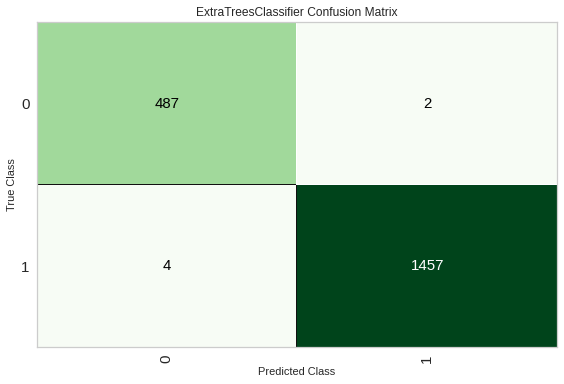

In [ ]:
# plotando matriz de confusão
plot_model(tuned_et, plot='confusion_matrix')

Outra visualização extremamente importante é a de `feature_importances`. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Em outras palavras, estamos medindo o poder preditivo de cada variável.

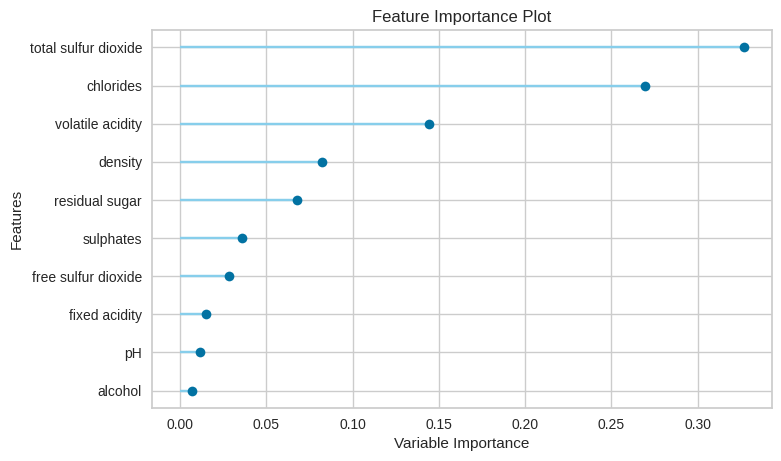

In [ ]:
# feature importances
plot_model(tuned_et, plot='feature')

Aqui, também podemos utilizar essa visaulização interativa, que nos ajuda a entender melhor a performance de nosso modelo a partir de diferentes tipos de avaliação.

In [ ]:
# avaliando o modelo
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizar o Modelo

Agora que já conseguimos instanciar, treinar e avaliar nosso modelo, é hora de fazer previsões no nosso conjunto de testes.

In [ ]:
# fazendo previsões
predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9969,0.9999,0.9973,0.9986,0.9979,0.9918,0.9918


In [ ]:
# finalizando o modelo
final_et = finalize_model(tuned_et)

In [ ]:
# verificando os parâmetros
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=7, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0001,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=7122, verbose=0, warm_start=False)


In [ ]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_et, data=test)